# Problem statement 2

For the given graph below design A* algorithm to find optimal path between Delhi and Mumbai.

# Name:Aditya Marathe
# Roll number:2215002
# IT DA(I)

In [64]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Define the graph with distances between cities
graph = {
    'Delhi': {'Agra': 230, 'Jaipur': 280, 'Mumbai': 1400},
    'Agra': {'Delhi': 230, 'Jaipur': 240, 'Mumbai': 1200},
    'Jaipur': {'Delhi': 280, 'Agra': 240, 'Mumbai': 1150},
    'Mumbai': {'Delhi': 1400, 'Agra': 1200, 'Jaipur': 1150}
}
h_graph = {
    'Delhi': {'Agra': 200, 'Jaipur': 220, 'Mumbai': 1300},
    'Agra': {'Delhi': 210, 'Jaipur': 220, 'Mumbai': 1000},
    'Jaipur': {'Delhi': 250, 'Agra': 210, 'Mumbai': 1000},
    'Mumbai': {'Delhi': 1200, 'Agra': 1100, 'Jaipur': 1050}
}
# Define the heuristic function
def heuristic(city_a, city_b):
    return h_graph[city_a].get(city_b,float('inf'))

# Define the A* algorithm
def a_star(graph, start, goal):
    queue=[]
    heapq.heappush(queue,(0,start))
    g_scores={start:0}
    paths={start:None}
    while queue:
        __,current_node=heapq.heappop(queue)
        if current_node==goal:
            path=[]
            while current_node is not  None:
                path.append(current_node)
                current_node=paths[current_node]
            path.reverse()
            return path
        for neighbor in graph[current_node]:
            new_g_score=g_scores[current_node]+graph[current_node][neighbor]
            if neighbor not in g_scores or new_g_score < g_scores[neighbor]:
                g_scores[neighbor] = new_g_score
                h_score=heuristic(neighbor,goal)
                f_score=new_g_score + h_score
                
                heapq.heappush(queue,(f_score,neighbor))
                paths[neighbor]=current_node
    return None



# Define a function to find all paths
def find_all_paths(graph, start, end, path=[]):
    path=path+[start]
    if start==end:
        return [path]
    if start not in graph:
        return []
    paths=[]
    
    for node in graph[start]:
        if node not in path:
            newpaths=find_all_paths(graph,node,end,path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths


# Define a function to calculate the total cost of a path
def path_cost(graph, path):
    return sum(graph[path[i]][path[i+1]] for i in range (len(path)-1))


In [65]:
# Find all paths and their costs
all_paths = find_all_paths(graph, 'Delhi', 'Mumbai')
print("All possible paths and their costs:")
for path in all_paths:
    print(path, "Cost:", path_cost(graph, path))


All possible paths and their costs:
['Delhi', 'Agra', 'Jaipur', 'Mumbai'] Cost: 1620
['Delhi', 'Agra', 'Mumbai'] Cost: 1430
['Delhi', 'Jaipur', 'Agra', 'Mumbai'] Cost: 1720
['Delhi', 'Jaipur', 'Mumbai'] Cost: 1430
['Delhi', 'Mumbai'] Cost: 1400


In [66]:
# Find the optimal path and its cost
optimal_path = a_star(graph, 'Delhi', 'Mumbai')
print("Optimal path and its cost:",path_cost(graph,optimal_path))

Optimal path and its cost: 1400


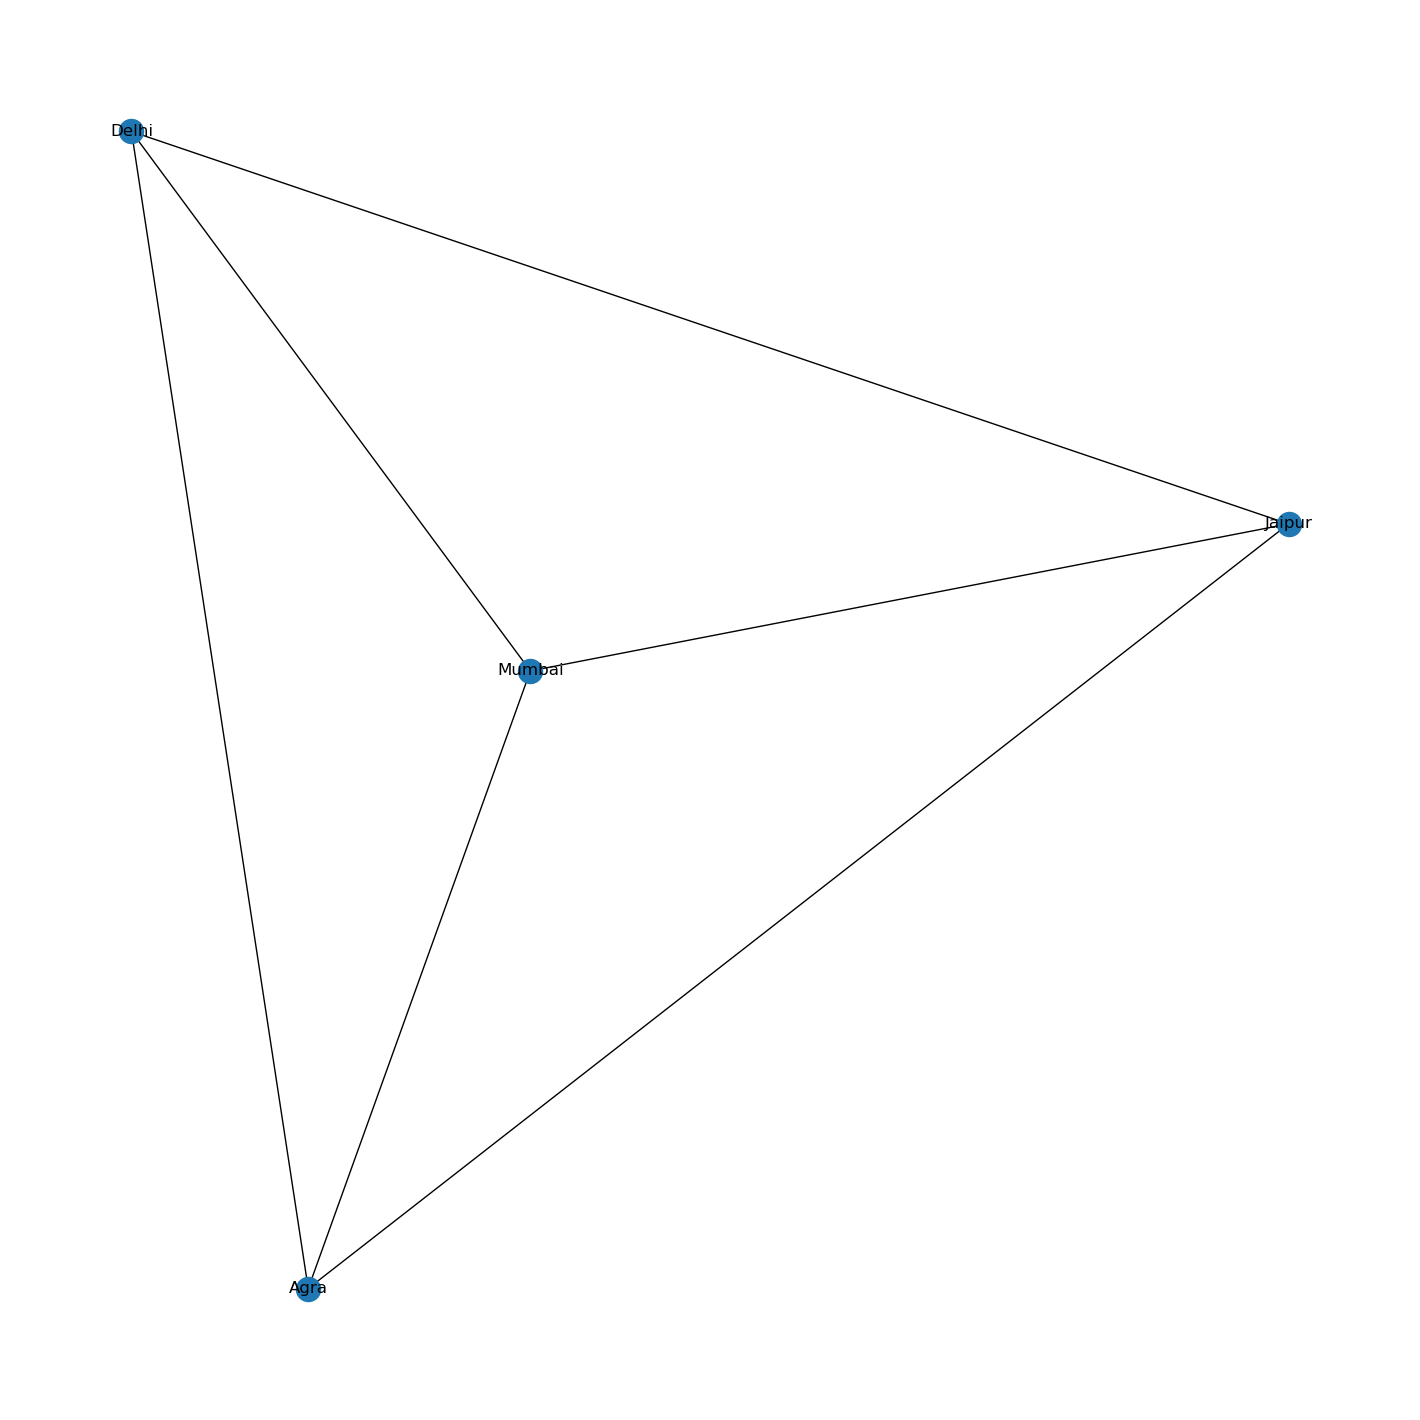

In [67]:
# Create a color map
colors = cm.rainbow(np.linspace(0, 1, len(graph)))
plt.figure(figsize=(14, 14))

# Create a graph
G = nx.Graph()

# Add edges to the graph
for city in graph:
    for neighbor in graph[city]:
        G.add_edge(city, neighbor, weight=graph[city][neighbor])

# Draw the graph
random_state = 42  # you can choose any number
pos = nx.spring_layout(G, seed=random_state)  # positions for all nodes


# Color each city differently
for city in graph:
    for neighbor in graph[city]:
        G.add_edge(city, neighbor, weight=graph[city][neighbor])

# Draw the graph
nx.draw(G, pos, with_labels=True)

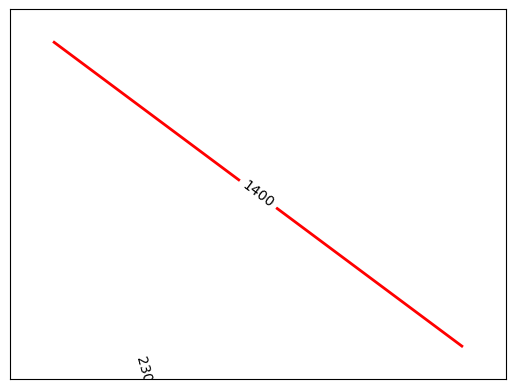

In [68]:
# Draw the optimal path
optimal_path_edges = [(optimal_path[i], optimal_path[i+1]) for i in range(len(optimal_path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=optimal_path_edges, edge_color='r', width=2)


# Display the weights
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()